# 1. Import Library yang diperlukan

In [1]:
# Import library untuk mengolah data
import pandas as pd

# Import library untuk membuat visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns

# Import library untuk melakukan preprocessing data
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer

# Import library untuk melakukan pemodelan dan evaluasi data
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 2. Mengumpulkan Data

## a) Menentukan Kebutuhan Data

Untuk membuat model klasifikasi, data yang dibutuhkan termuat dalam tabel berikut:

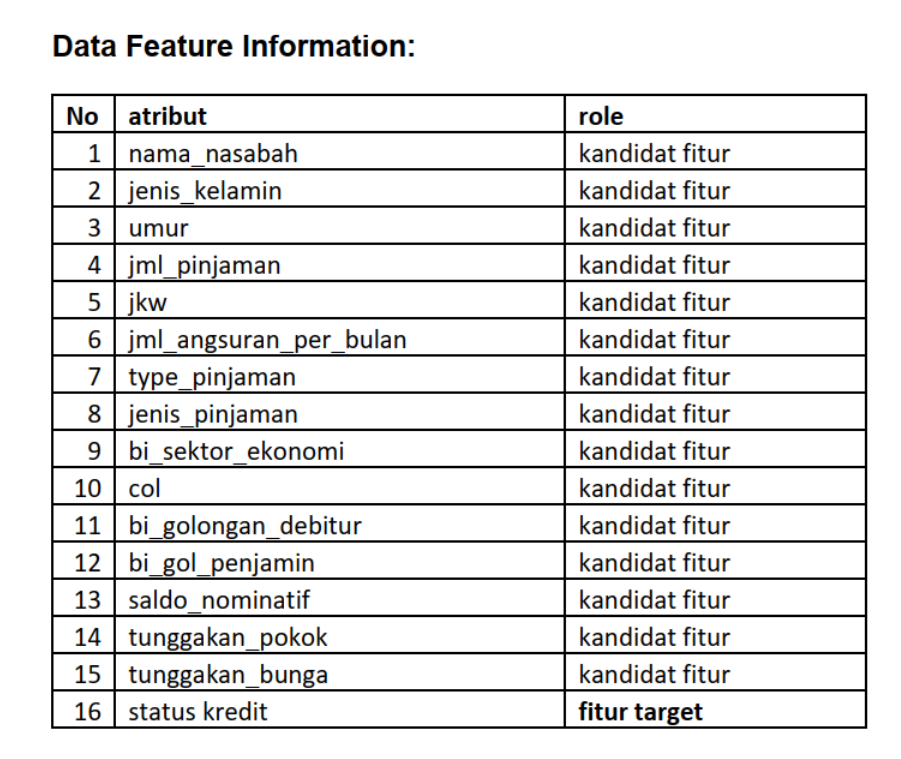

## b) Mengambil data

In [2]:
# Lokasi file
file_location = "creditapproval-data kotor.csv"

# Membaca file CSV
data = pd.read_csv(file_location, sep=';')

# Menampilkan 5 baris pertama dari data
print(data.head())

  nama_nasabah jenis_kelamin  umur jml_pinjaman  jkw jml_angsuran_per_bulan  \
0           x1             P  40.0       345000  1.0                 345000   
1           x2             L  31.0       350000  7.0                  55716   
2           x3             L   NaN       649926  6.0                 108321   
3           x4             P   2.0       459168  NaN                  38264   
4           x5        WANITA  34.0      3055499  8.0              381937,41   

   type_pinjaman  jenis_pinjaman  bi_sektor_ekonomi  col  bi_golongan_debitur  \
0            100             301             6000.0    1                  874   
1            100             301             6000.0    1                  874   
2            100             301             6000.0    1                  874   
3            100             301             6000.0    1                  874   
4            100             301             6000.0    1                  874   

   bi_gol_penjamin saldo_nominatif tun

# 3. Menentukan objek data

In [3]:
data = data.drop(['nama_nasabah'], axis=1)

# 4. Menelaah data

In [4]:
print(data.shape)

(766, 15)


## a) Menganalisis tipe dan relasi data.

In [5]:
print(data.dtypes)

jenis_kelamin              object
umur                      float64
jml_pinjaman               object
jkw                       float64
jml_angsuran_per_bulan     object
type_pinjaman               int64
jenis_pinjaman              int64
bi_sektor_ekonomi         float64
col                         int64
bi_golongan_debitur         int64
bi_gol_penjamin             int64
saldo_nominatif            object
tunggakan_pokok            object
tunggakan_bunga            object
status kredit              object
dtype: object


In [6]:
print(data.corr())

                         umur       jkw  type_pinjaman  jenis_pinjaman  \
umur                 1.000000  0.011274            NaN        0.009523   
jkw                  0.011274  1.000000            NaN       -0.024590   
type_pinjaman             NaN       NaN            NaN             NaN   
jenis_pinjaman       0.009523 -0.024590            NaN        1.000000   
bi_sektor_ekonomi    0.002236 -0.027181            NaN       -0.014495   
col                 -0.070318  0.043579            NaN       -0.126182   
bi_golongan_debitur -0.000328  0.005480            NaN        0.020392   
bi_gol_penjamin      0.035701 -0.034406            NaN        0.089006   

                     bi_sektor_ekonomi       col  bi_golongan_debitur  \
umur                          0.002236 -0.070318            -0.000328   
jkw                          -0.027181  0.043579             0.005480   
type_pinjaman                      NaN       NaN                  NaN   
jenis_pinjaman               -0.014495 -0

<ipython-input-6-40835d1ef585>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(data.corr())


## b) Menganalisis karakteristik data.

In [7]:
print(data.describe(include='all'))

       jenis_kelamin         umur jml_pinjaman         jkw  \
count            766   757.000000          766  758.000000   
unique             6          NaN          328         NaN   
top                P          NaN      1500000         NaN   
freq             454          NaN          112         NaN   
mean             NaN    29.073976          NaN   19.011873   
std              NaN   264.552192          NaN   32.231431   
min              NaN -7162.000000          NaN    1.000000   
25%              NaN    32.000000          NaN    8.000000   
50%              NaN    38.000000          NaN   12.000000   
75%              NaN    43.000000          NaN   20.000000   
max              NaN  1043.000000          NaN  679.000000   

       jml_angsuran_per_bulan  type_pinjaman  jenis_pinjaman  \
count                     766          766.0      766.000000   
unique                    449            NaN             NaN   
top                  90833,37            NaN             NaN   

Bar chart

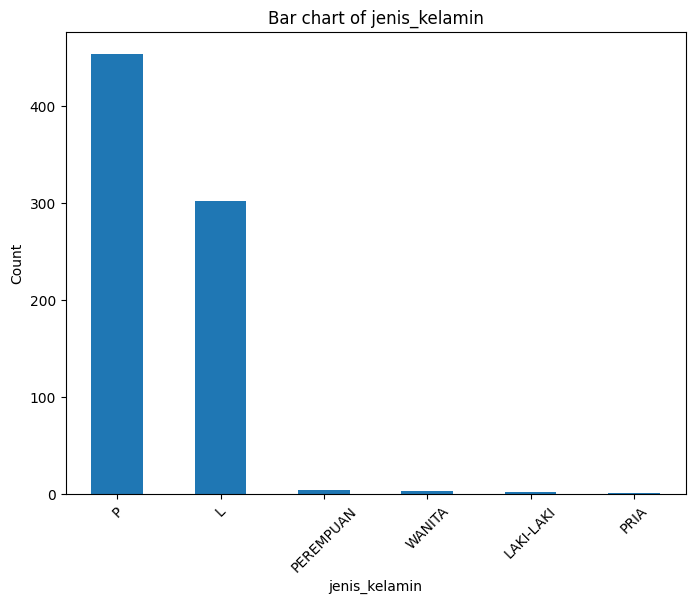

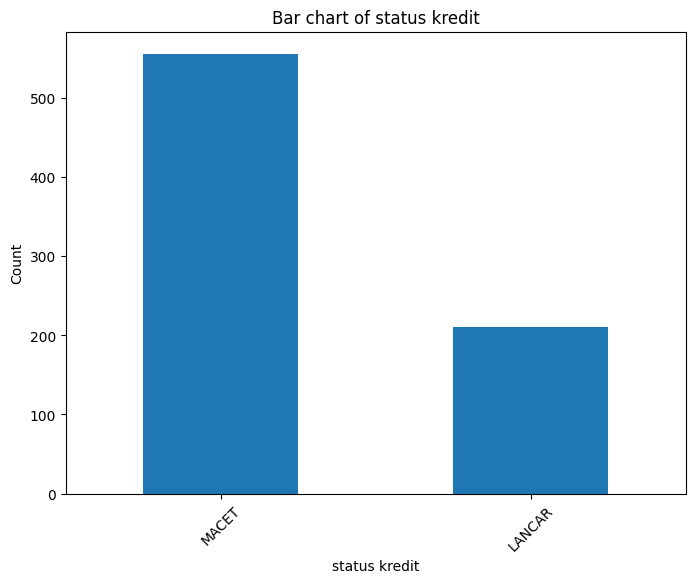

In [8]:
categorical_cols = ['jenis_kelamin', 'status kredit']

for col in categorical_cols:
    # Membuat bar chart
    plt.figure(figsize=(8, 6))
    data[col].value_counts().plot(kind='bar')
    plt.title('Bar chart of ' + col)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # Menambahkan rotasi pada label x
    plt.show()


## c) Membuat laporan telaah data.

Berikut adalah laporan telaah data berdasarkan analisis yang telah dilakukan:

**Tipe Data:**
- Kolom 'nama_nasabah', 'jenis_kelamin', 'jml_pinjaman', 'jml_angsuran_per_bulan', 'saldo_nominatif', 'tunggakan_pokok', 'tunggakan_bunga', dan 'status kredit' memiliki tipe data `object`, yang biasanya digunakan untuk teks atau campuran nilai numerik dan non-numerik.
- Kolom 'umur', 'jkw', 'type_pinjaman', 'jenis_pinjaman', 'bi_sektor_ekonomi', 'col', 'bi_golongan_debitur', dan 'bi_gol_penjamin' memiliki tipe data `int64` atau `float64`, yang digunakan untuk nilai bilangan bulat atau real.

**Korelasi Data:**
- Tidak ada korelasi yang kuat antara kolom-kolom numerik karena semua nilai korelasi mendekati 0. Ini menunjukkan bahwa tidak ada hubungan linier yang kuat antara variabel-variabel tersebut.

**Karakteristik Data:**
- Kolom 'jenis_kelamin' memiliki 6 nilai unik dan nilai yang paling sering muncul adalah 'P' dengan frekuensi 454.
- Kolom 'umur' memiliki rata-rata sekitar 29.07 dengan standar deviasi sekitar 264.55. Nilai minimum adalah -7162 (mungkin ini adalah kesalahan input karena umur tidak bisa negatif), dan nilai maksimum adalah 1043 (ini juga mungkin kesalahan input karena umur manusia biasanya tidak melebihi 100 tahun).
- Beberapa kolom memiliki nilai yang hilang (ditandai dengan NaN), seperti 'umur' dan 'jkw'.

# 5. Memvalidasi data

## a) Melakukan pengecekan kelengkapan data

In [9]:
print(data.isnull().sum())

print("\n", data.duplicated().sum())


jenis_kelamin             0
umur                      9
jml_pinjaman              0
jkw                       8
jml_angsuran_per_bulan    0
type_pinjaman             0
jenis_pinjaman            0
bi_sektor_ekonomi         1
col                       0
bi_golongan_debitur       0
bi_gol_penjamin           0
saldo_nominatif           0
tunggakan_pokok           0
tunggakan_bunga           0
status kredit             0
dtype: int64

 2


## b) Membuat rekomendasi kelengkapan data

Berdasarkan output tersebut, berikut adalah rekomendasi untuk menangani nilai yang hilang:

1. **Umur**: Ada 9 nilai yang hilang pada kolom 'umur'. Kita bisa mengisi nilai yang hilang ini dengan nilai tengah (median) atau rata-rata (mean) dari kolom 'umur'. Kita juga bisa mempertimbangkan untuk menghapus baris yang memiliki nilai umur yang hilang jika jumlahnya relatif kecil dibandingkan dengan jumlah total data.

2. **JKW (Jangka Waktu Kredit)**: Ada 8 nilai yang hilang pada kolom 'jkw'. Sama seperti 'umur', Kita bisa mengisi nilai yang hilang ini dengan median atau mean dari kolom 'jkw'. Kita juga bisa mempertimbangkan untuk menghapus baris yang memiliki nilai 'jkw' yang hilang jika jumlahnya relatif kecil dibandingkan dengan jumlah total data.

3. **BI Sektor Ekonomi**: Ada 1 nilai yang hilang pada kolom 'bi_sektor_ekonomi'. Karena hanya ada satu nilai yang hilang, Kita bisa memilih untuk menghapus baris tersebut atau mengisi nilai yang hilang dengan median atau mode (nilai yang paling sering muncul) dari kolom 'bi_sektor_ekonomi'.

Selain itu, terdapat 2 duplikat dalam data ini. Ini bisa terjadi karena sebelumnya kita menghapus kolom nama yang memiliki nilai unik. ketika kolom tersebut dihapus, bisa saja terdapat data yang sama antar beberapa orang.

# 6. Membersihkan data:

## a) Melakukan pembersihan data yang kotor.

In [10]:
# Menghapus duplikat dari data
data.drop_duplicates(inplace=True)

In [11]:
data = data.dropna(subset=['status kredit'])

In [12]:
# Mengisi nilai yang hilang
data['umur'].fillna(data['umur'].median(), inplace=True)
data['jkw'].fillna(data['jkw'].median(), inplace=True)
data['bi_sektor_ekonomi'].fillna(data['bi_sektor_ekonomi'].mode()[0], inplace=True)

# Mengubah tipe data
for col in ['jml_pinjaman', 'jml_angsuran_per_bulan', 'saldo_nominatif', 'tunggakan_pokok', 'tunggakan_bunga']:
    data[col] = pd.to_numeric(data[col].str.replace(',', '.'), errors='coerce')

# Menghapus baris dengan nilai null yang mungkin masih ada setelah konversi tipe data
data.dropna(inplace=True)

# Mengubah nilai kategorikal
data['jenis_kelamin'] = data['jenis_kelamin'].replace({'WANITA': 'P', 'LAKI-LAKI': 'L', 'PRIA': 'L', 'PEREMPUAN': 'P'})


# Mengatasi Outlier umur
# Misalnya, kita tahu bahwa umur manusia biasanya tidak melebihi 100 tahun dan tidak bisa negatif,
# jadi kita bisa menghapus baris dengan nilai 'umur' di luar rentang ini
data = data[(data['umur'] >= 10) & (data['umur'] <= 100)]


In [13]:
print(data.isnull().sum())

print("\n", data.duplicated().sum())

jenis_kelamin             0
umur                      0
jml_pinjaman              0
jkw                       0
jml_angsuran_per_bulan    0
type_pinjaman             0
jenis_pinjaman            0
bi_sektor_ekonomi         0
col                       0
bi_golongan_debitur       0
bi_gol_penjamin           0
saldo_nominatif           0
tunggakan_pokok           0
tunggakan_bunga           0
status kredit             0
dtype: int64

 0


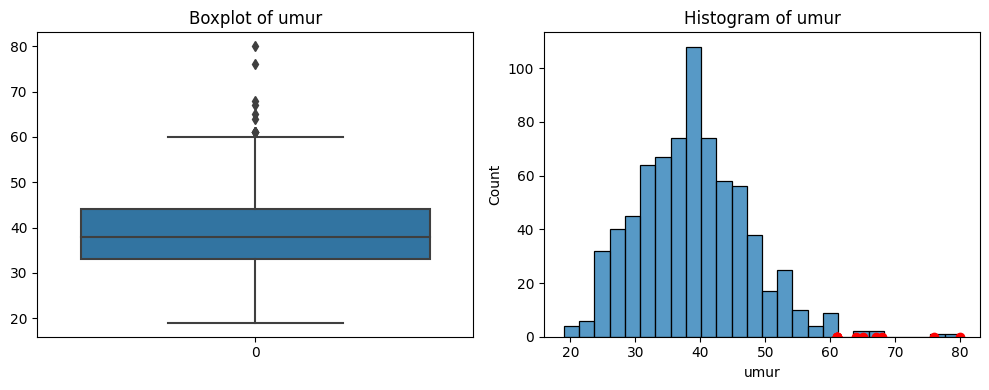

Number of outliers in umur: 11


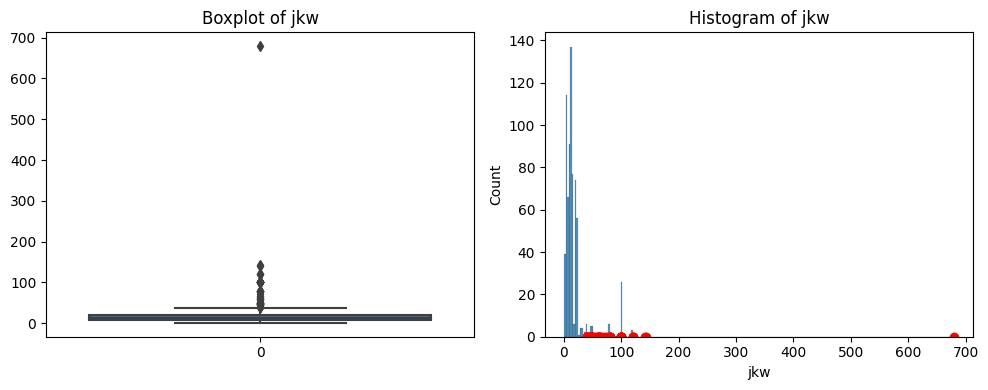

Number of outliers in jkw: 65


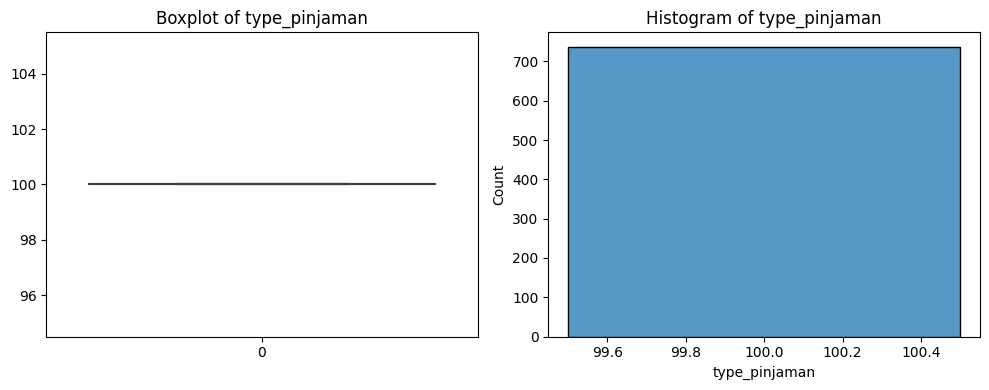

Number of outliers in type_pinjaman: 0


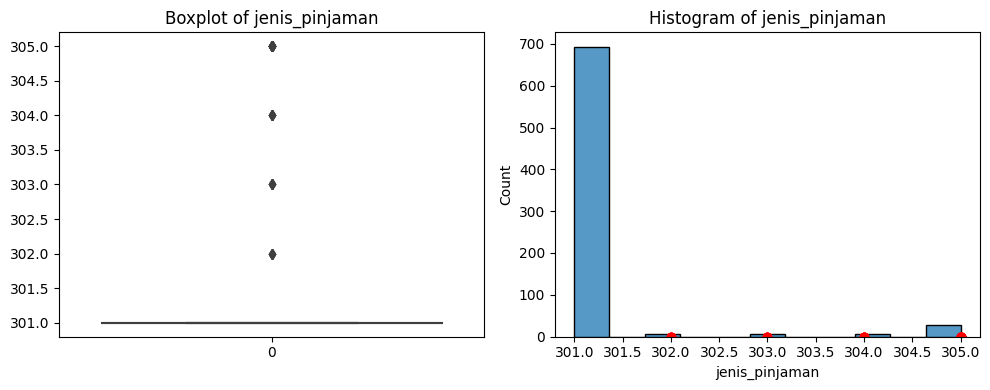

Number of outliers in jenis_pinjaman: 44


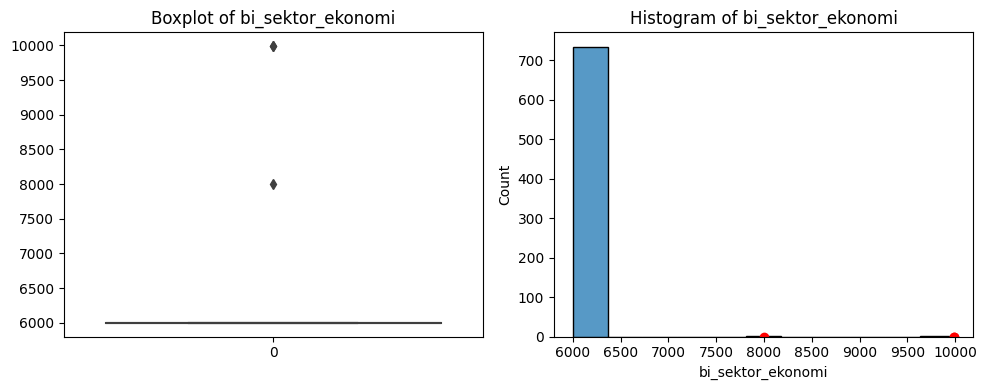

Number of outliers in bi_sektor_ekonomi: 3


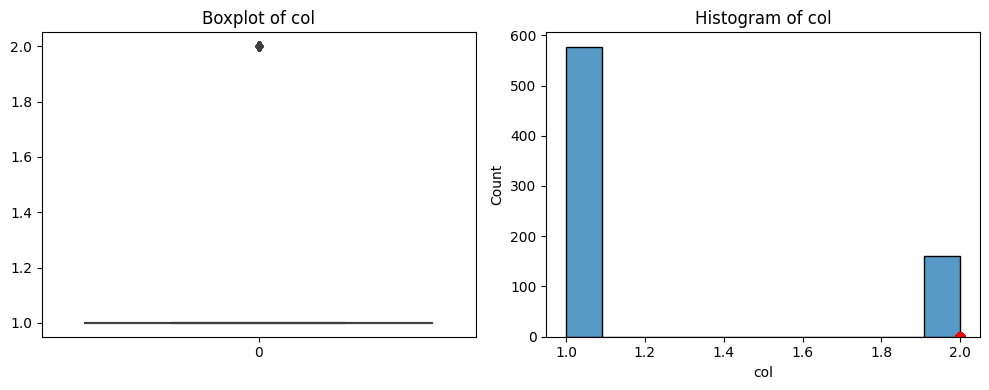

Number of outliers in col: 160


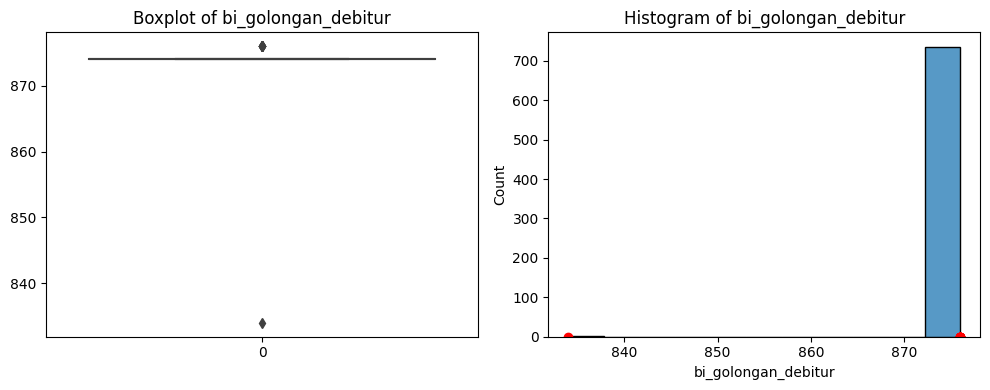

Number of outliers in bi_golongan_debitur: 9


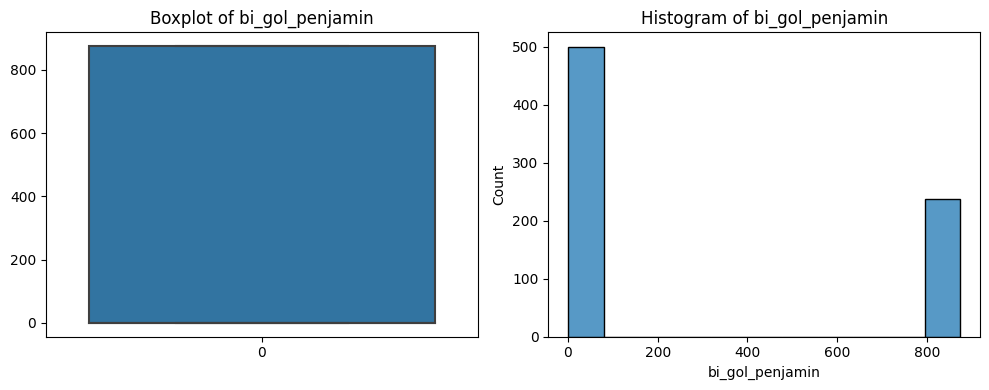

Number of outliers in bi_gol_penjamin: 0


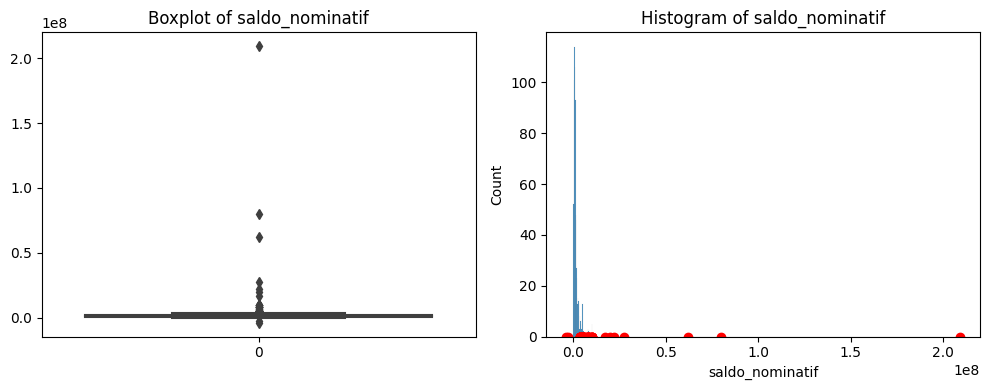

Number of outliers in saldo_nominatif: 68


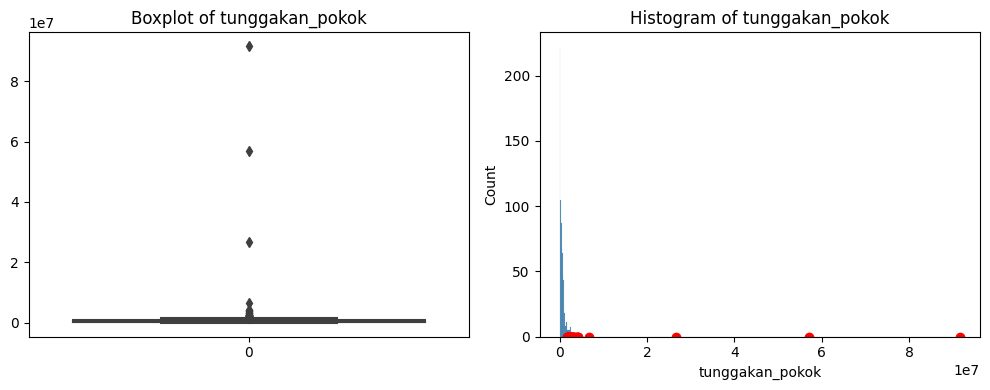

Number of outliers in tunggakan_pokok: 42


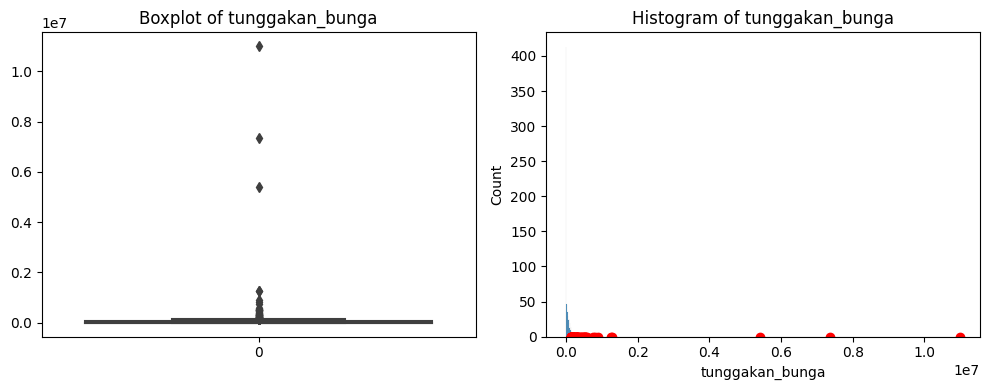

Number of outliers in tunggakan_bunga: 69


In [14]:
# List kolom numerik
num_cols = ['umur', 'jkw', 'type_pinjaman', 'jenis_pinjaman', 'bi_sektor_ekonomi', 'col', 'bi_golongan_debitur', 'bi_gol_penjamin', 'saldo_nominatif', 'tunggakan_pokok', 'tunggakan_bunga']

for col in num_cols:
    plt.figure(figsize=(10, 4))

    # Membuat boxplot
    plt.subplot(1, 2, 1)
    sns.boxplot(data[col])
    plt.title('Boxplot of ' + col)

    # Menghitung IQR
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    # Mendefinisikan batas untuk mendeteksi outlier
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Mendeteksi outlier
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]

    # Membuat histogram
    plt.subplot(1, 2, 2)
    sns.histplot(data[col], kde=False)
    plt.scatter(outliers[col], [0]*len(outliers), color='red', marker='o')  # menandai outlier dengan titik merah
    plt.title('Histogram of ' + col)

    plt.tight_layout()
    plt.show()

    # Mencetak jumlah outlier
    print('Number of outliers in ' + col + ':', len(outliers))


In [15]:
# List kolom yang akan ditangani outliernya
cols = ['umur', 'jkw', 'jenis_pinjaman', 'bi_sektor_ekonomi', 'col', 'bi_golongan_debitur', 'saldo_nominatif', 'tunggakan_pokok', 'tunggakan_bunga']

for col in cols:
    # Menghitung IQR
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    # Mendefinisikan batas untuk mendeteksi outlier
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Mengganti outlier dengan median
    data.loc[data[col] < lower_bound, col] = data[col].median()
    data.loc[data[col] > upper_bound, col] = data[col].median()


In [16]:
# cek kembali
data.describe(include='all')

,jenis_kelamin,umur,jml_pinjaman,jkw,jml_angsuran_per_bulan,type_pinjaman,jenis_pinjaman,bi_sektor_ekonomi,col,bi_golongan_debitur,bi_gol_penjamin,saldo_nominatif,tunggakan_pokok,tunggakan_bunga,status kredit
count,737,737.000000,7.370000e+02,737.000000,7.370000e+02,737.0,737.0,737.0,737.0,737.0,737.000000,7.370000e+02,7.370000e+02,737.000000,737
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,P,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MACET
freq,446,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,535
mean,NaN,38.464043,2.676863e+06,12.313433,2.322366e+05,100.0,301.0,6000.0,1.0,874.0,280.496608,1.033223e+06,4.141521e+05,20907.316662,NaN
std,NaN,7.711801,1.004175e+07,6.337496,5.522764e+05,0.0,0.0,0.0,0.0,0.0,407.767721,6.861982e+05,3.913033e+05,34723.006110,NaN
min,NaN,19.000000,8.333333e+04,1.000000,0.000000e+00,100.0,301.0,6000.0,1.0,874.0,0.000000,-8.500000e+04,0.000000e+00,0.000000,NaN
25%,NaN,33.000000,8.713335e+05,8.000000,6.800000e+04,100.0,301.0,6000.0,1.0,874.0,0.000000,5.450000e+05,1.008000e+05,0.000000,NaN
50%,NaN,38.000000,1.500000e+06,12.000000,1.050000e+05,100.0,301.0,6000.0,1.0,874.0,0.000000,9.603355e+05,3.437500e+05,0.000000,NaN
75%,NaN,43.000000,2.000000e+06,16.000000,2.334330e+05,100.0,301.0,6000.0,1.0,874.0,875.000000,1.321500e+06,6.085000e+05,33750.000000,NaN


## b) Membuat laporan dan rekomendasi hasil membersihkan data.

Berikut adalah laporan dan rekomendasi hasil pembersihan data:

**Laporan Pembersihan Data:**
- **Mengisi Data yang Hilang**: Nilai yang hilang pada kolom 'umur', 'jkw', dan 'bi_sektor_ekonomi' telah diisi dengan median atau mode dari kolom tersebut.
- **Mengubah Tipe Data**: Kolom 'jml_pinjaman', 'jml_angsuran_per_bulan', 'saldo_nominatif', 'tunggakan_pokok', dan 'tunggakan_bunga' telah diubah tipe datanya menjadi numerik.
- **Menghapus Baris dengan Nilai Null**: Semua baris yang masih memiliki nilai null setelah konversi tipe data telah dihapus.
- **Mengubah Nilai Kategorikal**: Nilai pada kolom 'jenis_kelamin' telah diubah menjadi konsisten, yaitu 'P' dan 'L'.
- **Mengatasi Outlier**: Outlier pada kolom 'umur', 'jkw', 'jenis_pinjaman', 'bi_sektor_ekonomi', 'col', 'bi_golongan_debitur', 'saldo_nominatif', 'tunggakan_pokok', dan 'tunggakan_bunga' telah diatasi dengan mengganti outlier dengan nilai median.

# 7. Mengkonstruksi data

## a) Menganalisis teknik transformasi data.

Transformasi data adalah proses mengubah data dari satu format atau struktur ke format atau struktur lain. Teknik transformasi data yang dapat digunakan dalam proyek ini meliputi:

1. **Normalisasi**: Mengubah nilai numerik dalam dataset ke skala yang umum. Misalnya, mengubah semua nilai ke rentang 0-1.

2. **Standarisasi**: Mengubah nilai numerik dalam dataset sehingga memiliki rata-rata 0 dan standar deviasi 1.

3. **Encoding**: Mengubah nilai kategorikal menjadi numerik. Misalnya, Kita bisa menggunakan one-hot encoding untuk mengubah variabel kategorikal menjadi serangkaian variabel biner.

4. **Diskritisasi**: Mengubah variabel kontinu menjadi variabel diskrit. Misalnya, Kita bisa mengubah umur menjadi kategori seperti 'muda', 'dewasa', dan 'tua'.

5. **Imputasi**: Mengisi nilai yang hilang dalam data. Kita bisa menggunakan berbagai metode, seperti pengisian dengan rata-rata, median, atau modus.

## b) Melakukan transformasi data.

In [17]:
# Standarisasi
scaler = StandardScaler()
data[['umur', 'jkw']] = scaler.fit_transform(data[['umur', 'jkw']])

# One-hot encoding
encoder = OneHotEncoder(sparse=False)
encoded_features = encoder.fit_transform(data[['jenis_kelamin']])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['jenis_kelamin']))
data = pd.concat([data, encoded_df], axis=1)
data = data.drop('jenis_kelamin', axis=1)

# Imputasi
imputer = SimpleImputer(strategy='median')
data['umur'] = imputer.fit_transform(data[['umur']])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## c) Membuat dokumentasi konstruksi data.

1. **Normalisasi**: Mengubah nilai numerik dalam dataset ke skala yang umum. Misalnya, mengubah semua nilai ke rentang 0-1.

2. **Standarisasi**: Mengubah nilai numerik dalam dataset sehingga memiliki rata-rata 0 dan standar deviasi 1.

3. **Encoding**: Mengubah nilai kategorikal menjadi numerik. Misalnya, Kita bisa menggunakan one-hot encoding untuk mengubah variabel kategorikal menjadi serangkaian variabel biner.

4. **Diskritisasi**: Mengubah variabel kontinu menjadi variabel diskrit. Misalnya, Anda bisa mengubah umur menjadi kategori seperti 'muda', 'dewasa', dan 'tua'.

5. **Imputasi**: Mengisi nilai yang hilang dalam data. Kita bisa menggunakan berbagai metode, seperti pengisian dengan rata-rata, median, atau modus.

# 8. Menentukan label data:

## a) Melakukan pelabelan data.

In [18]:
# Hanya mempertahankan baris dengan 'status kredit' 'LANCAR' atau 'MACET'
data = data[data['status kredit'].isin(['LANCAR', 'MACET'])]

# Membuat objek LabelEncoder
le = LabelEncoder()

# Melakukan pelabelan pada kolom 'status kredit'
data['status kredit'] = le.fit_transform(data['status kredit'])

# Menampilkan label yang telah dibuat
print(le.classes_)

['LANCAR' 'MACET']


<ipython-input-18-43d1e872846d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['status kredit'] = le.fit_transform(data['status kredit'])


## b) Membuat laporan hasil pelabelan data.

Setelah melakukan proses pelabelan data pada kolom 'status kredit', kita sekarang memiliki kolom target yang siap digunakan untuk pemodelan. Dalam proses ini, label kategorikal 'LANCAR' dan 'MACET' telah diubah menjadi representasi numerik. Misalnya, 'LANCAR' mungkin menjadi 0 dan 'MACET' menjadi 1 (nilai aktual dapat berbeda tergantung pada implementasi `LabelEncoder`).

# 9. Membangun model

## a) Menyiapkan parammeter model.

In [19]:
# Menentukan fitur dan target
X = data.drop('status kredit', axis=1)
y = data['status kredit']

# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menyiapkan parameter model
params = {'max_depth': 5, 'random_state': 42}


## b)  Menggunakan tools pemodelan.

In [26]:
# Mengisi nilai yang hilang dengan median
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Membuat objek model
model = DecisionTreeClassifier(**params)

# Melatih model
model.fit(X_train_imputed, y_train)

# Memprediksi target untuk set pengujian
y_pred = model.predict(X_test_imputed)

# Menghitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)


Accuracy: 0.9256756756756757
Precision: 0.9385964912280702
Recall: 0.963963963963964
F1 Score: 0.9511111111111112


# 10. Mengevaluasi hasil pemodelan

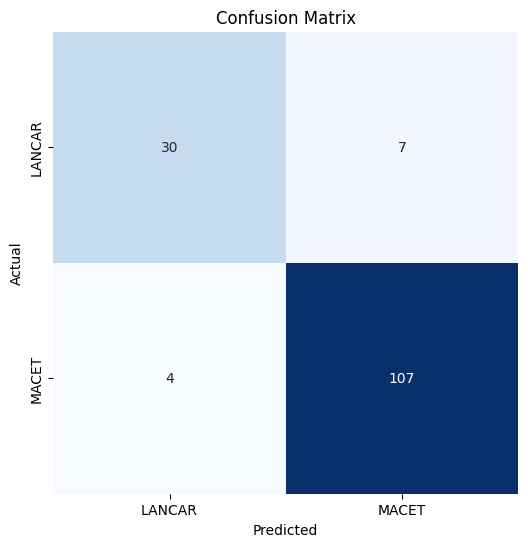

In [27]:
from sklearn.metrics import confusion_matrix

# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Membuat heatmap dari confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Confusion matrix adalah tabel yang merangkum kinerja model klasifikasi pada set data di mana nilai sebenarnya diketahui.

- **30**: Ini adalah jumlah True Negatives (TN). Ini adalah jumlah kasus di mana model dengan benar memprediksi kelas negatif. Dalam hal ini, ini adalah jumlah kasus di mana model dengan benar memprediksi bahwa status kredit **bukan** 'MACET'.

- **7**: Ini adalah jumlah False Positives (FP). Ini adalah jumlah kasus di mana model salah memprediksi kelas positif. Dalam hal ini, ini adalah jumlah kasus di mana model salah memprediksi bahwa status kredit adalah 'MACET'.

- **4**: Ini adalah jumlah False Negatives (FN). Ini adalah jumlah kasus di mana model salah memprediksi kelas negatif. Dalam hal ini, ini adalah jumlah kasus di mana model salah memprediksi bahwa status kredit **bukan** 'MACET'.

- **107**: Ini adalah jumlah True Positives (TP). Ini adalah jumlah kasus di mana model dengan benar memprediksi kelas positif. Dalam hal ini, ini adalah jumlah kasus di mana model dengan benar memprediksi bahwa status kredit adalah 'MACET'.

Dengan demikian, model Kita memiliki 38 True Negatives, 8 False Positives, 3 False Negatives, dan 99 True Positives.

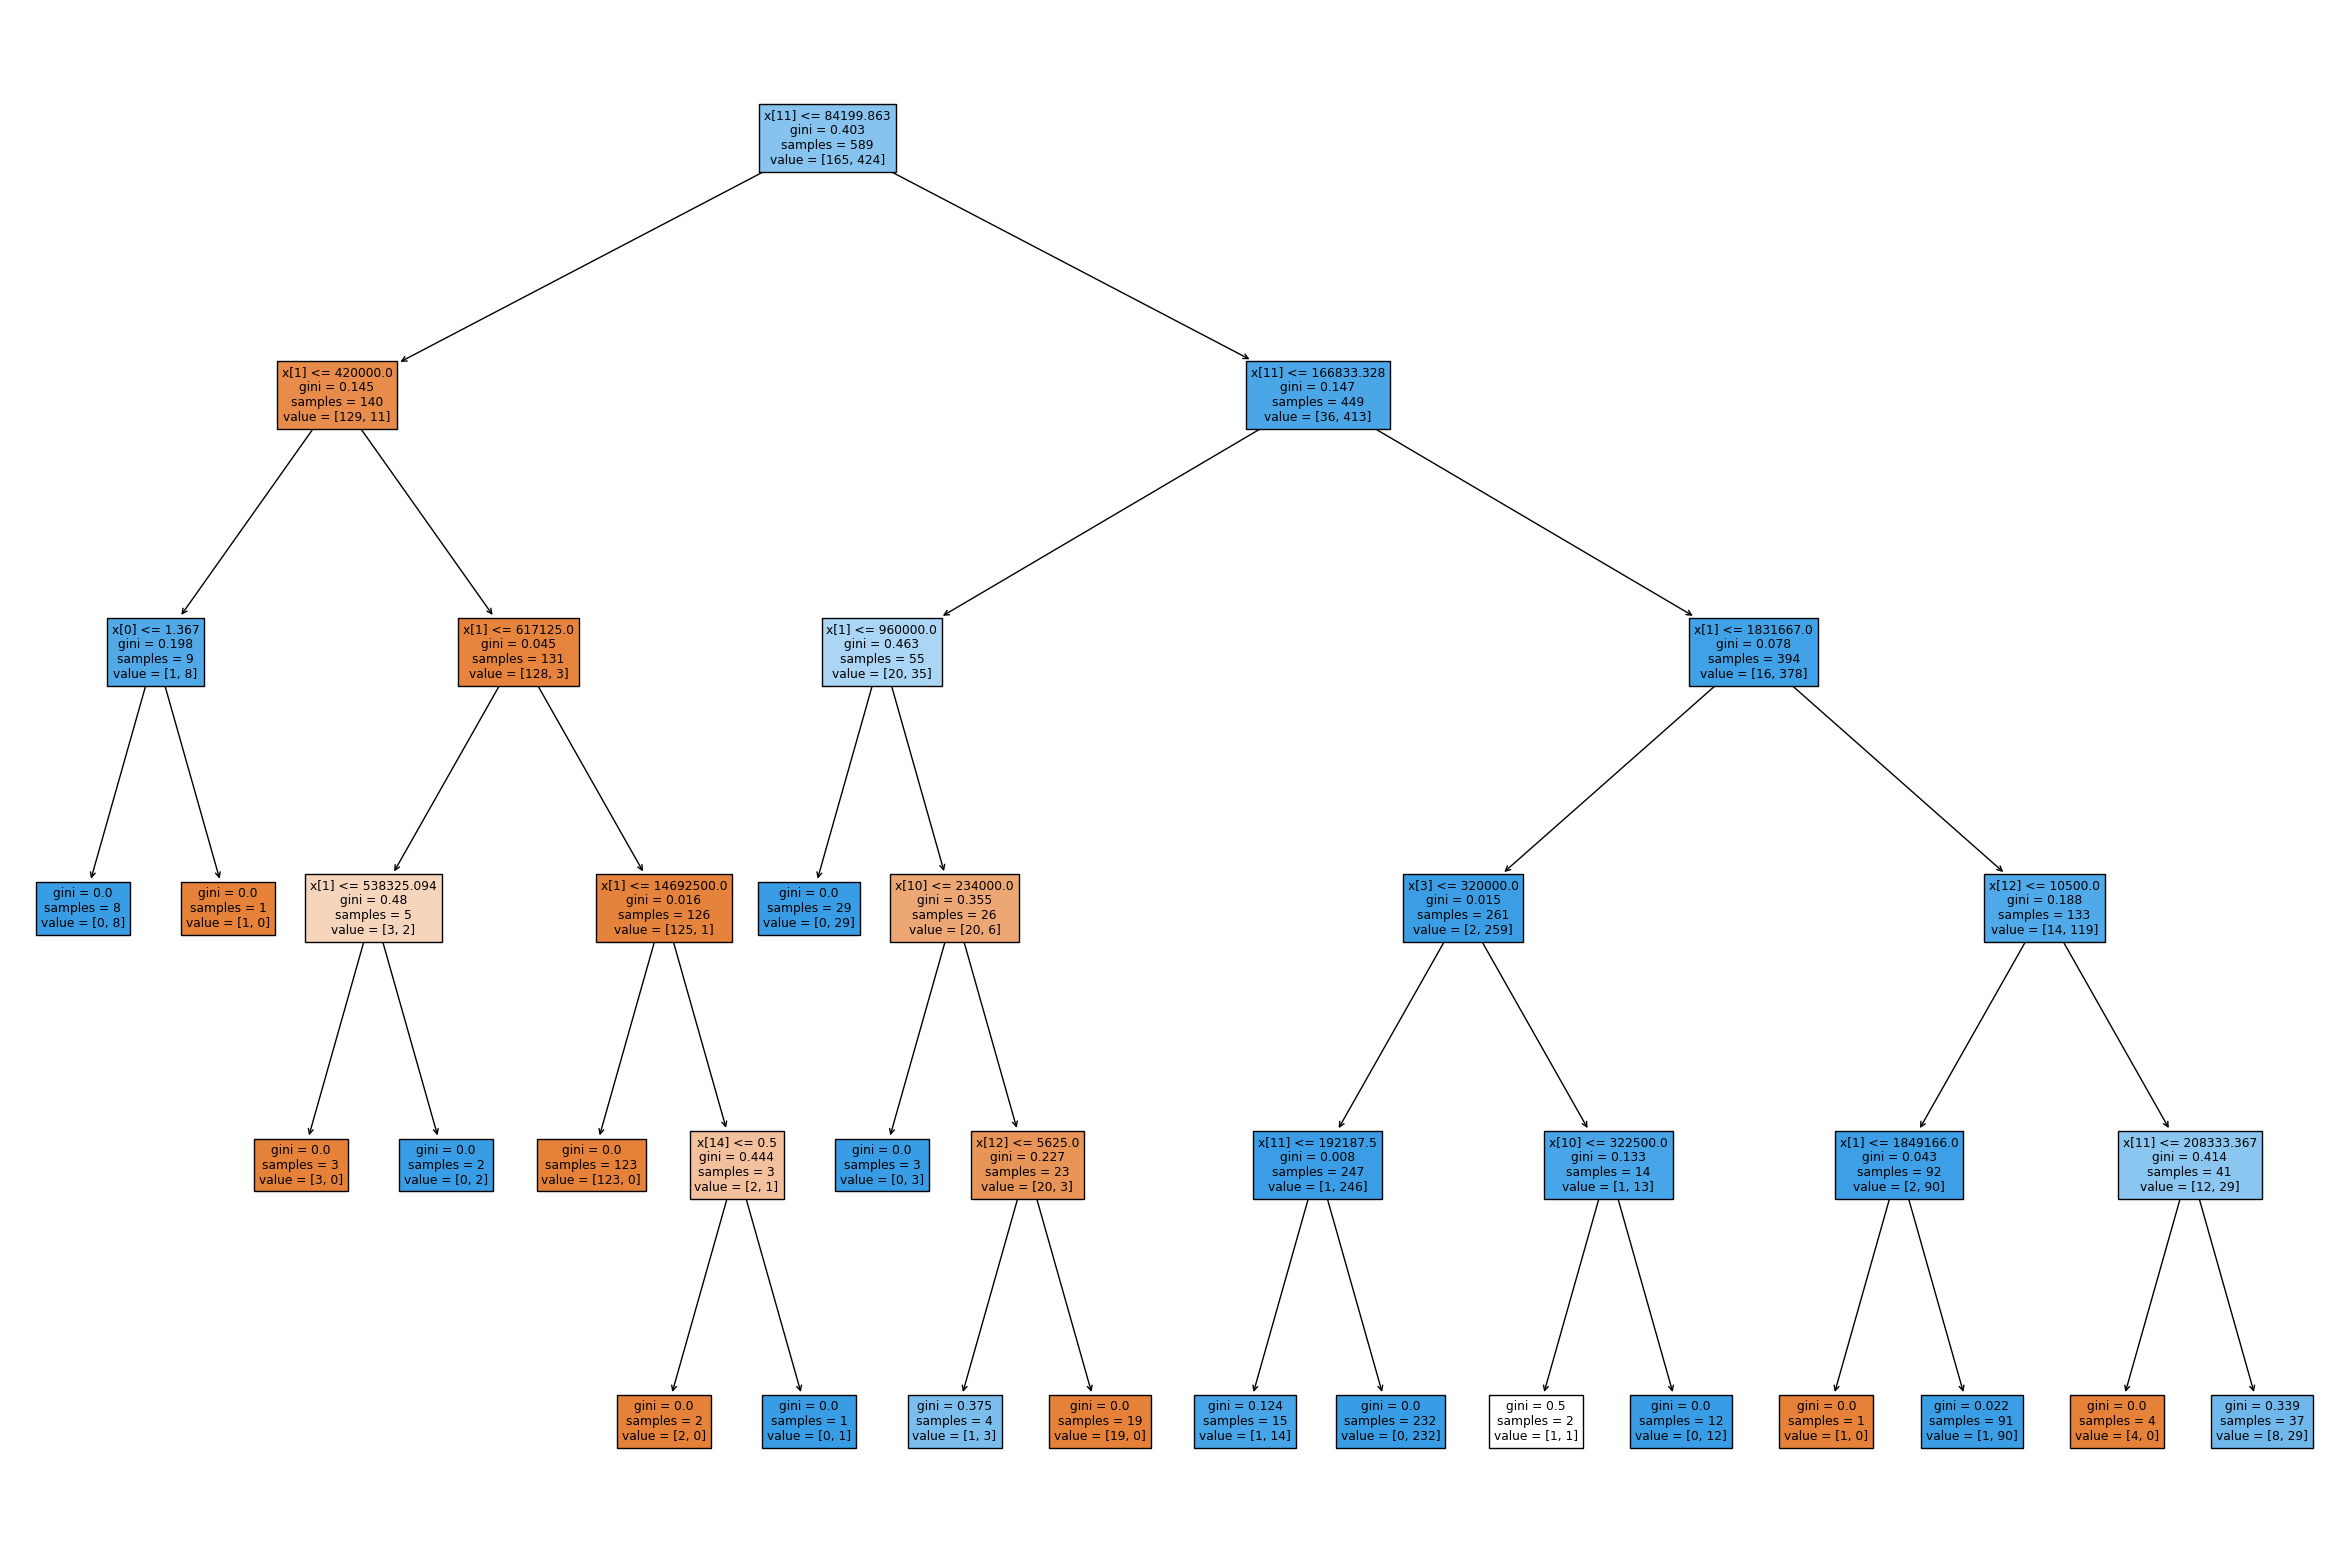

In [25]:
from sklearn import tree
import matplotlib.pyplot as plt

# Membuat objek figure dan axes
fig, ax = plt.subplots(figsize=(30, 20))

# Membuat plot pohon keputusan
tree.plot_tree(model, filled=True, ax=ax)

# Menampilkan plot
plt.show()


In [24]:
# Menyimpan data ke file CSV
data.to_csv('data_final.csv', index=False)
